## **Placement Classification** 

In [116]:
import numpy as np
import pandas as pd

In [117]:
df = pd.read_csv("F:\Campusx\Project1\Placement.csv")

In [118]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [119]:
df.shape

(100, 4)

##### **Steps**

*0.Preprocess + EDA+ Feature Selection*

*1.Extract input and output columns*

*2.Scale the values*

*3.Train test split*

*4.Train the model*

*5.Evaluate the model*

*6.Deploy the model*

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


there is no any single null value is present 

In [121]:
df = df.iloc[:,1:] 

removed the column which have no role 

In [122]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [123]:
import matplotlib.pyplot as plt

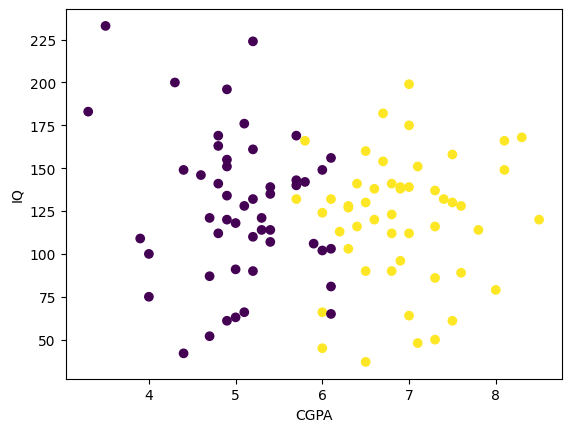

In [124]:
plt.ylabel('IQ')
plt.xlabel('CGPA')
plt.scatter(df['CGPA'],df['IQ'], c= df['Placement'])
plt.show()

In [125]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [126]:
X.head()

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142


In [127]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: Placement, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.1)

In [129]:
x_train

,CGPA,IQ
79,6.5,90
38,6.5,160
2,5.3,121
9,5.1,66
77,7.3,50
...,...,...
91,7.5,158
63,6.3,128
29,7.0,112
68,4.0,75


In [130]:
x_test

,CGPA,IQ
57,6.5,130
96,4.4,42
78,6.1,81
99,6.2,113
30,7.6,128
48,6.6,138
71,6.1,132
59,4.8,112
60,6.9,139
54,6.4,141


In [131]:
y_train

79    1
38    1
2     0
9     0
77    1
     ..
91    1
63    1
29    1
68    0
49    0
Name: Placement, Length: 90, dtype: int64

In [132]:
y_test

57    1
96    0
78    0
99    1
30    1
48    1
71    1
59    0
60    1
54    1
Name: Placement, dtype: int64

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
x_train = scaler.fit_transform(x_train)

In [136]:
x_train

array([[ 0.45476205, -0.8491044 ],
       [ 0.45476205,  0.87538229],
       [-0.57922325, -0.08540315],
       [-0.75155413, -1.44035698],
       [ 1.14408559, -1.83452537],
       [-1.0962159 , -0.92301097],
       [ 0.79942382,  0.33340076],
       [ 0.88558926,  0.35803629],
       [-1.69937399, -0.60274916],
       [-1.01005046,  0.40730733],
       [ 0.71325838, -0.30712287],
       [ 0.71325838, -0.8491044 ],
       [-0.83771957, -0.15930972],
       [ 0.5409275 , -0.11003867],
       [ 1.83340913,  0.60439153],
       [-0.66538869,  0.18558762],
       [-0.92388502,  0.65366258],
       [-0.66538869,  0.90001782],
       [-1.01005046,  1.09710201],
       [-0.83771957, -1.51426355],
       [ 1.83340913,  1.02319544],
       [ 0.62709294,  1.41736383],
       [ 0.02393484, -0.01149658],
       [-1.78553944, -0.38102944],
       [ 0.71325838,  0.40730733],
       [ 1.31641647,  0.13631657],
       [ 0.79942382, -0.70129126],
       [-0.75155413,  1.26955068],
       [ 0.02393484,

In [137]:
x_test = scaler.fit_transform(x_test)

In [138]:
x_test

array([[ 0.38146904,  0.48111319],
       [-1.97466328, -2.45902299],
       [-0.06731807, -1.15600809],
       [ 0.04487871, -0.08686766],
       [ 1.61563359,  0.41429192],
       [ 0.49366582,  0.7483983 ],
       [-0.06731807,  0.54793447],
       [-1.52587617, -0.1202783 ],
       [ 0.83025615,  0.78180894],
       [ 0.26927227,  0.84863022]])

#### Model Training

In [139]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Testing the model

In [140]:
y_pred = clf.predict(x_test)

In [141]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [142]:
y_test

57    1
96    0
78    0
99    1
30    1
48    1
71    1
59    0
60    1
54    1
Name: Placement, dtype: int64

used to see the accuracy of the model

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_test,y_pred)

0.8

desicion boundary made bye the model 

In [145]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

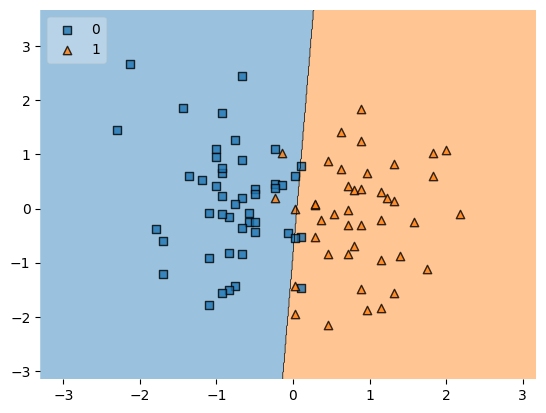

In [146]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)

In [156]:
import joblib

joblib.dump(clf, "placement_model.pkl")
import joblib

model = joblib.load("placement_model.pkl")
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>
